In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
from numpy import mean
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
ME = Base.classes.measurement
ST = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
#printing out the column nanmes in the tables using inspector
inspector = inspect(engine)
columnsM =inspector.get_columns('measurement')
for m in columnsM:
    print(m['name'])

columnsS = inspector.get_columns('station')
for s in columnsS:
    print(s['name'])

id
station
date
prcp
tobs
id
station
name
latitude
longitude
elevation


In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
latest = session.query(ME.date).order_by(ME.date.desc()).first()[0]
query_date = dt.datetime.strptime(latest, '%Y-%m-%d') - dt.timedelta(days=366)

# Perform a query to retrieve the data and precipitation scores
prcp = session.query(ME.date, ME.prcp).filter(ME.date>=query_date).order_by(ME.date.desc()).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp).set_index('date')

# Sort the dataframe by date
prcp_df.sort_values(by='date', ascending=True)

,prcp
date,
2016-08-23,0.70
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,1.79
2016-08-23,NaN
...,...
2017-08-22,0.00
2017-08-23,0.45
2017-08-23,0.08


<IPython.core.display.Javascript object>


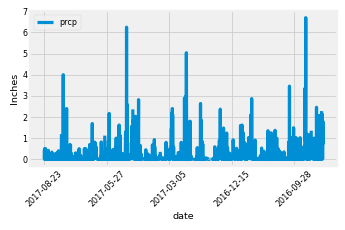

In [58]:
# Use Pandas Plotting with Matplotlib to plot the data
%matplotlib notebook
prcp_df.plot.line()
plt.xticks(rotation='45')
plt.ylabel("Inches")
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
stats_df = prcp_df.describe()
stats_df

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [15]:
# Design a query to show how many stations are available in this dataset?
number = session.query(func.count(ST.station)).all()
print(f"Total number of station in Hawaii is {number}")

Total number of station in Hawaii is [(9,)]


In [16]:
# What are the most active stations? (i.e. what stations have the most rows)?
busiest = session.query(ME.station, func.count(ME.station)).group_by(ME.station).\
order_by(func.count(ME.station).desc()).first()
print(f"The busiest station id and number of measurements done are: {busiest}")

The busiest station id and number of measurements done are: ('USC00519281', 2772)


In [17]:
# List the stations and the counts in descending order.
count = session.query(ME.station, func.count(ME.station)).group_by(ME.station).\
order_by(func.count(ME.station).desc()).all()
count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the station id from the previous query, calculate the lowest temperature recorded
lowest=session.query(func.min(ME.tobs)).filter(ME.station =='USC00519281').all()
print(f"The lowest temperature measured at USC00519281 station is {lowest}")

The lowest temperature measured at USC00519281 station is [(54.0,)]


In [19]:
# Using the station id from the previous query, highest temperature recorded
highest=session.query(func.max(ME.tobs)).filter(ME.station =='USC00519281').all()
print(f"The highest temperature measured at USC00519281 station is {highest}")

The highest temperature measured at USC00519281 station is [(85.0,)]


In [20]:
#Using the station id from the previous query, average temperature of the most active station?
temps = session.query(func.avg(ME.tobs)).filter(ME.station=='USC00519281').scalar()
print(f"Average temperature measured at USC00519281 station is {temps}")

Average temperature measured at USC00519281 station is 71.66378066378067


In [21]:
# Choose the station with the highest number of temperature observations.
tempstation = session.query(ME.station, func.count(ME.tobs)).group_by(ME.station).\
order_by(func.count(ME.tobs).desc()).first()
print(f"The station measured the highest number of temperature & the number of measured temperature is :{tempstation}")


The station measured the highest number of temperature & the number of measured temperature is :('USC00519281', 2772)


In [53]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

latest = session.query(ME.date).order_by(ME.date.desc()).first()[0]
query_date = dt.datetime.strptime(latest, '%Y-%m-%d') - dt.timedelta(days=366)
data = session.query(ME.tobs, ME.date).filter(ME.station =='USC00519281').\
    filter(ME.date>=query_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
data_df = pd.DataFrame(data).set_index('date')

x = data_df['tobs']



<IPython.core.display.Javascript object>


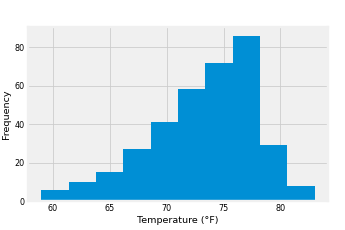

In [57]:
%matplotlib notebook
plt.hist(x)
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.show()

In [28]:
# Perform a query to retrieve the data and temperature
tem = session.query(ME.date, ME.tobs).filter(ME.station == "USC00519281").order_by(ME.date.desc()).all()


In [29]:
# Save the query results as a Pandas DataFrame and set the index to the date column
tem_df = pd.DataFrame(tem)
